In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def runOneSample(doors):
    switch_reward =0
    no_switch_reward = 0
    
    # prize door is fixed
    # independently 
    currsample = np.random.choice(doors,p=[1/5]*5)
    playerchsample = np.random.choice(doors,p=[1/5]*5)
    
    #compute the winning if candidate switches or otherwise
    if(currsample == playerchsample):
        #residue = doors[doors!=currsample]
        ##FILL IN BELOW AS NECESSARY
        #doorShown = np.sort(np.random.choice(residue, XXX, replace=False))
        residue = doors[doors!=currsample]
        doorShown = np.sort(np.random.choice(residue, 2, replace=False))
        no_switch_reward += 1
    else:
        ##FILL IN BELOW AS NECESSARY       
        residue = doors[doors!=currsample]
        residue = residue[residue!=playerchsample]
        gshchoice = np.random.choice(residue,1)
        secondSwitchChoices = doors[doors!=playerchsample]
        secondSwitchChoices = secondSwitchChoices[secondSwitchChoices!=gshchoice]
        secondSwitch = np.random.choice(secondSwitchChoices, 1)
        if(secondSwitch== currsample):
            switch_reward += 1
    return switch_reward, no_switch_reward

def runMultipleMethod1(doors, reps=10000):
    csr =0
    cnsr = 0
    for idx in range(reps):
        tsr, tnsr = runOneSample(doors)
        #UPDATE csr and cnsr
        csr += tsr
        cnsr+= tnsr
    return csr/reps,cnsr/reps

def runSimulationMethod1(doors):
    outerReps = 100
    sr = np.zeros(outerReps)
    nsr = np.zeros(outerReps)
    for oRidx in range(outerReps):
        tsr,tnsr = runMultipleMethod1(doors)
        #UPDATE sr and nsr
        sr[oRidx] = tsr
        nsr[oRidx] = tnsr

    plt.hist(sr,XX)
    plt.show()
    plt.hist(nsr,YY)
    plt.show()

def runSimulationMethod2(doors,reps = 10000):    
    sr = np.zeros(reps)
    nsr = np.zeros(reps)
    for idx in range(reps):
        tsr, tnsr = runOneSample(doors)
        if idx ==0:
            sr[idx] = tsr
            nsr[idx]= tnsr
        else:
            #Update current estimate
            sr[idx] = (tsr + sr[idx-1]*(idx))/(idx+1)
            nsr[idx]= (tnsr + nsr[idx-1]*idx)/(idx+1)
    plt.plot(np.array(range(1,reps+1)), sr) 
    plt.plot(np.array(range(1,reps+1)), nsr) 

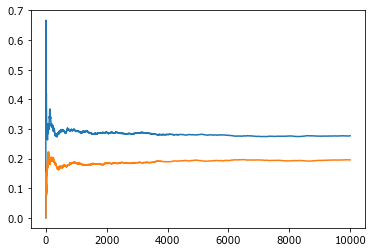

In [5]:
doors = np.array([1,2,3,4,5])  
runSimulationMethod1(doors)  
runSimulationMethod2(doors)